# Import packages

In [1]:
from keras.models import Sequential
import tensorflow as tf




from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

from tensorflow.keras.optimizers import SGD, RMSprop, Adam 
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import cv2
import csv
from numpy import random
from PIL import  Image



# load Raw dataset

In [85]:
data=open('C:\\Users\\RAHEEM\Desktop\\dataset\\football_golden_foot.csv')
data=pd.read_csv(data)




In [86]:
data

,folder_name,filename
0,alessandro_del_piero,0016c4771c.jpg
1,alessandro_del_piero,008a84657a.jpg
2,alessandro_del_piero,0156ce23f5.jpg
3,alessandro_del_piero,04f705db4d.jpg
4,alessandro_del_piero,05aa02a997.jpg
...,...,...
7185,zlatan_ibrahimovic,fe7fddc7e4.jpg
7186,zlatan_ibrahimovic,febf3d67c5.jpg
7187,zlatan_ibrahimovic,fef1b86098.jpg
7188,NaN,NaN


# Discover Raw Dataset

In [87]:
print('X shape ->',x.shape)
print('array type',type(x))
print('first value in x',x.values[:1])

# Using drop() function to delete last row
x.drop(index=x.index[-1],axis=0,inplace=True)
x.drop(index=x.index[-1],axis=0,inplace=True)
print('last value in x',x.tail())
print('content of dataframe',x)

print('first column',x['folder_name'])
print('try',x['folder_name'][0])
print('head before delete',x.head())
# x.drop(0 ,inplace=True)
print('head after delete',x.head())

X shape -> (7188, 2)
array type <class 'pandas.core.frame.DataFrame'>
first value in x [['alessandro_del_piero' '0016c4771c.jpg']]
last value in x              folder_name        filename
7181  zlatan_ibrahimovic  f7fb51e5fb.jpg
7182  zlatan_ibrahimovic  fad65dd278.jpg
7183  zlatan_ibrahimovic  fbb5763678.jpg
7184  zlatan_ibrahimovic  fde3265e2f.jpg
7185  zlatan_ibrahimovic  fe7fddc7e4.jpg
content of dataframe                folder_name        filename
0     alessandro_del_piero  0016c4771c.jpg
1     alessandro_del_piero  008a84657a.jpg
2     alessandro_del_piero  0156ce23f5.jpg
3     alessandro_del_piero  04f705db4d.jpg
4     alessandro_del_piero  05aa02a997.jpg
...                    ...             ...
7181    zlatan_ibrahimovic  f7fb51e5fb.jpg
7182    zlatan_ibrahimovic  fad65dd278.jpg
7183    zlatan_ibrahimovic  fbb5763678.jpg
7184    zlatan_ibrahimovic  fde3265e2f.jpg
7185    zlatan_ibrahimovic  fe7fddc7e4.jpg

[7186 rows x 2 columns]
first column 0       alessandro_del_piero
1  

# prepare dataset

In [88]:
labels =['lionel_messi','cristiano_ronaldo','pele','mohamed_salah','zlatan_ibrahimovic','ronaldinho']
print("head before modifying is",x.head())
i=0
for neededLabels in x['folder_name'] :
  
    if neededLabels not in labels:
        
        x.drop(i ,inplace=True)
    i+=1
print("head after modifying is",x.head())   

head before modifying is             folder_name        filename
0  alessandro_del_piero  0016c4771c.jpg
1  alessandro_del_piero  008a84657a.jpg
2  alessandro_del_piero  0156ce23f5.jpg
3  alessandro_del_piero  04f705db4d.jpg
4  alessandro_del_piero  05aa02a997.jpg
head after modifying is             folder_name        filename
1014  cristiano_ronaldo  002d1969db.jpg
1015  cristiano_ronaldo  00f4f88ab0.jpg
1016  cristiano_ronaldo  02fef0c068.jpg
1017  cristiano_ronaldo  036e267689.jpg
1018  cristiano_ronaldo  03eacf0178.jpg


In [89]:
print('shape after modifying', data.shape)
data

shape after modifying (7190, 2)


,folder_name,filename
0,alessandro_del_piero,0016c4771c.jpg
1,alessandro_del_piero,008a84657a.jpg
2,alessandro_del_piero,0156ce23f5.jpg
3,alessandro_del_piero,04f705db4d.jpg
4,alessandro_del_piero,05aa02a997.jpg
...,...,...
7185,zlatan_ibrahimovic,fe7fddc7e4.jpg
7186,zlatan_ibrahimovic,febf3d67c5.jpg
7187,zlatan_ibrahimovic,fef1b86098.jpg
7188,NaN,NaN


# Generate a new dataset

In [ ]:
headers =['Folder_Name','File_Name']
content =x
# with open('football_dataset.csv','w') as fd:
#     data=csv.writer(fd)
#     data.writerow(headers)
#     data.writerows(content)    
x.to_csv("C:\\Users\\RAHEEM\Desktop\\Football_dataset.csv")

# Load generated dataset

In [2]:
data=open('C:\\Users\\RAHEEM\Desktop\\selectedProject\\football_dataset.csv')
dataset=pd.read_csv(data)

In [3]:
dataset

,index,folder_name,filename
0,0,cristiano_ronaldo,002d1969db.jpg
1,1,cristiano_ronaldo,00f4f88ab0.jpg
2,2,cristiano_ronaldo,02fef0c068.jpg
3,3,cristiano_ronaldo,036e267689.jpg
4,4,cristiano_ronaldo,03eacf0178.jpg
...,...,...,...
1929,1929,zlatan_ibrahimovic,fbb5763678.jpg
1930,1930,zlatan_ibrahimovic,fde3265e2f.jpg
1931,1931,zlatan_ibrahimovic,fe7fddc7e4.jpg
1932,1932,zlatan_ibrahimovic,febf3d67c5.jpg


# Display a sample from dataset

In [ ]:
# path_test = "C:\\Users\\RAHEEM\\Desktop\\selectedProject\\football_golden_foot\\football_golden_foot\\cristiano_ronaldo\\00f4f88ab0.jpg"
labels =['lionel_messi','cristiano_ronaldo','pele','mohamed_salah','zlatan_ibrahimovic','ronaldinho']
img=cv2.imread(r"C:\\Users\\RAHEEM\\Desktop\\selectedProject\\football_golden_foot\\football_golden_foot\\cristiano_ronaldo\\00f4f88ab0.jpg")

print("array of pixels",img)
print(" default image height , width",img.shape)
IMG_SIZE=150


img_array = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
resized_image = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

plt.imshow(resized_image)
print(" resized image height , width",resized_image.shape)


# Discover Dataset

In [20]:
numberOfCr7Images=len(dataset[dataset['folder_name']=='cristiano_ronaldo'])
print('number of cristiano_ronaldo images :',numberOfCr7Images)

number of cristiano_ronaldo images : 346


In [22]:
numberOflionel_messiImages=len(dataset[dataset['folder_name']=='lionel_messi'])
print('number of lionel_messi images :',numberOflionel_messiImages)

number of lionel_messi images : 332


In [23]:
numberOfpeleImages=len(dataset[dataset['folder_name']=='pele'])
print('number of pele images :',numberOfpeleImages)

number of pele images : 241


In [25]:
numberOfmohamed_salahImages=len(dataset[dataset['folder_name']=='mohamed_salah'])
print('number of mohamed_salah images :',numberOfmohamed_salahImages)


number of mohamed_salah images : 348


In [26]:
numberOfzlatan_ibrahimovicImages=len(dataset[dataset['folder_name']=='zlatan_ibrahimovic'])
print('number of zlatan_ibrahimovic images :',numberOfzlatan_ibrahimovicImages)


number of zlatan_ibrahimovic images : 346


In [27]:
numberOfronaldinhoImages=len(dataset[dataset['folder_name']=='ronaldinho'])
print('number of ronaldinho images :',numberOfronaldinhoImages)


number of ronaldinho images : 321


# Visualization of dataset

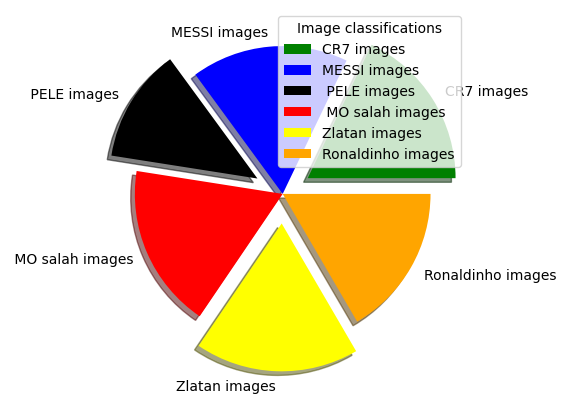

In [37]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([numberOfCr7Images, numberOflionel_messiImages, numberOfpeleImages,numberOfmohamed_salahImages,numberOfzlatan_ibrahimovicImages,numberOfronaldinhoImages])
mylabels = ["CR7 images", "MESSI images", " PELE images"," MO salah images",'Zlatan images','Ronaldinho images']
myexplode = [0.2, 0, 0.2,0,0.2,0]
mycolors = ["green", "blue", "black",'red','yellow','orange']
plt.pie(y, labels = mylabels,explode = myexplode,shadow = True,colors = mycolors)
plt.legend(title = "Image classifications")

plt.show()

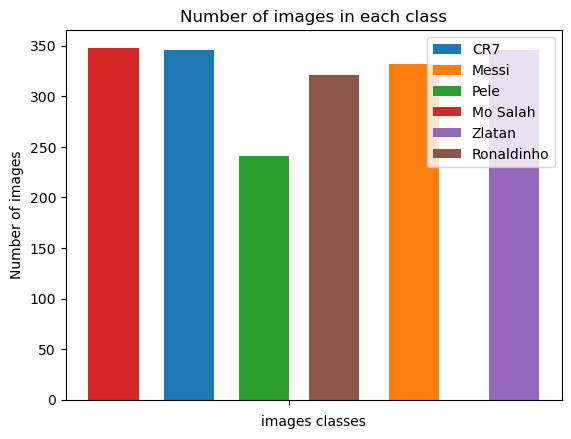

In [81]:
categories = ['']
a = [numberOfCr7Images]
b = [numberOflionel_messiImages]
c=  [numberOfmohamed_salahImages]
d=[numberOfzlatan_ibrahimovicImages]
e=[numberOfronaldinhoImages]
f=[numberOfpeleImages]
X_axis = np.arange(len(categories))
  
plt.bar(X_axis - 0.4, a, 0.2, label = 'CR7')
plt.bar(X_axis + 0.5, b, 0.2, label = 'Messi')
plt.bar(X_axis - 0.1, f, 0.2, label = 'Pele')  
plt.bar(X_axis - 0.7, c, 0.2, label = 'Mo Salah')
plt.bar(X_axis + 0.9, d, 0.2, label = 'Zlatan')
plt.bar(X_axis + 0.18, e, 0.2, label = 'Ronaldinho') 
plt.xticks(X_axis, categories)
plt.xlabel("images classes")
plt.ylabel("Number of images")
plt.title("Number of images in each class")
plt.legend()
plt.show()

# Create Training data

In [107]:
directory = "C:\\Users\\RAHEEM\\Desktop\\selectedProject\\football_golden_foot\\football_golden_foot"
training = []
def createTrainingData():
    labelsId=0

    ## labels loop
    for labels in os.listdir(directory):
        labelsId+=1
        if labelsId ==1 :
             class_name='Cristiano ronaldo'
        elif labelsId ==2 :
            class_name='lionel Messi'
        elif labelsId==3 :
             class_name='Mohamed salah'
        elif labelsId ==4 :
            class_name='Pele'
        elif labelsId==5 :
             class_name='Ronaldinho'
        elif labelsId ==6 :
            class_name='Ibrahimovic'
            

        ## img loop
        for img in os.listdir(f"{directory}/{labels}"):
            path = os.path.join(f"{directory}/{labels}/{img}")
            img_array = cv2.imread(os.path.join(path))
#             print(img_array)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            resized_image = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#             print(class_name)
            
        
            training.append([resized_image, class_name])
#             print('shape after resize',resized_image.shape)
            
#                 print(img)

            
    
        
     
#     class_num = CATEGORIES.index(category)
#     for img in os.listdir(path):
#       img_array = cv2.imread(os.path.join(path,img))
#       new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#       training.append([new_array, class_num])

createTrainingData()

In [56]:
training

[[array([[[55, 41, 43],
          [55, 40, 43],
          [56, 41, 45],
          ...,
          [50, 46, 82],
          [54, 48, 78],
          [54, 49, 78]],
  
         [[55, 41, 43],
          [55, 40, 44],
          [56, 41, 45],
          ...,
          [51, 44, 81],
          [53, 47, 78],
          [53, 48, 77]],
  
         [[55, 41, 43],
          [55, 40, 44],
          [56, 41, 45],
          ...,
          [49, 43, 79],
          [51, 46, 77],
          [51, 46, 77]],
  
         ...,
  
         [[49, 54, 52],
          [49, 54, 52],
          [51, 54, 52],
          ...,
          [44, 44, 57],
          [39, 38, 46],
          [40, 38, 44]],
  
         [[49, 52, 49],
          [49, 52, 49],
          [51, 52, 49],
          ...,
          [44, 44, 55],
          [40, 39, 46],
          [41, 39, 45]],
  
         [[50, 51, 47],
          [50, 51, 47],
          [52, 51, 47],
          ...,
          [44, 44, 54],
          [40, 39, 44],
          [41, 40, 44]]], dtype=u

In [108]:
 
np_training =np.array(training,dtype=object)
# pd.DataFrame(np_training).to_csv("C:\\Users\\RAHEEM\Desktop\\selectedProject\\training_dataset.csv")

# np_training.to_csv("C:\\Users\\RAHEEM\Desktop\\train_dataset.csv")

# shuffle dataset

In [109]:

random.shuffle(training)

#  Assigning Labels and Features

In [110]:
X =[]
y =[]
for features, label in training:
    X.append(features)
    y.append(label)
#A 2D array can be reshaped into a 1D array using .reshape(-1). 
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y=np.array(y)
X.shape

(1934, 150, 150, 3)

# Normalising X and converting labels to categorical data

In [111]:
X = X.astype('float32')
X /= 255
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y=le.fit_transform(y)
#     def label_to_numeric(y):
#         if y=='Cristiano ronaldo': return 1
#         if y=='lionel Messi':   return 2
#         if y=='Mohamed salah': return 3
#         if y=='Pele':   return 4
#         if y=='Ronaldinho': return 5
#         if y=='Ibrahimovic':   return 6

#     df['gender_num'] = df['gender'].apply(gender_to_numeric)
#     print(df)
# from keras.utils import np_utils
# Y = np_utils.to_categorical(y, 6)
# print(Y[100])
# print(shape(Y))


#  Split X and Y for use in CNN

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

# Define, compile and train the CNN Model

In [113]:
# model = tf.keras.models.Sequential([
    
# 	# little bit overfit 80%
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3), use_bias=True),
#      tf.keras.layers.Dropout( 0.2),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # layer 2
#     tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', use_bias=True),
#      tf.keras.layers.Dropout( 0.2),
#     tf.keras.layers.MaxPooling2D(2,2),
# #     # layer 3
# #     tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', use_bias=True),
# #     tf.keras.layers.MaxPooling2D(2,2),
#     # layer 4
#     tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', use_bias=True),
#      tf.keras.layers.Dropout( 0.2),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     # layer 5
#     tf.keras.layers.Dense(128, activation = 'relu', use_bias=True ),
#      tf.keras.layers.Dropout( 0.2),
#     # layer 6
#     tf.keras.layers.Dense(6, activation='softmax', use_bias=True)
    
# ])
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
10/10 [==============================] - 5s 435ms/step - loss: 2.5765 - accuracy: 0.1770 - val_loss: 1.7928 - val_accuracy: 0.2387
Epoch 2/20
10/10 [==============================] - 4s 379ms/step - loss: 1.7207 - accuracy: 0.2425 - val_loss: 1.6199 - val_accuracy: 0.2871
Epoch 3/20
10/10 [==============================] - 4s 383ms/step - loss: 1.4856 - accuracy: 0.4034 - val_loss: 1.4577 - val_accuracy: 0.4194
Epoch 4/20
10/10 [==============================] - 4s 380ms/step - loss: 1.2128 - accuracy: 0.5740 - val_loss: 1.2599 - val_accuracy: 0.5387
Epoch 5/20
10/10 [==============================] - 4s 392ms/step - loss: 0.8947 - accuracy: 0.7033 - val_loss: 1.0417 - val_accuracy: 0.6452
Epoch 6/20
10/10 [==============================] - 4s 385ms/step - loss: 0.6334 - accuracy: 0.8076 - val_loss: 0.9807 - val_accuracy: 0.6677
Epoch 7/20
10/10 [==============================] - 4s 383ms/step - loss: 0.3744 - accuracy: 0.9119 - val_loss: 0.8914 - val_accuracy: 0.7355
Epoch 

# Visualize the model performance

In [114]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_accuracy vs val_accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

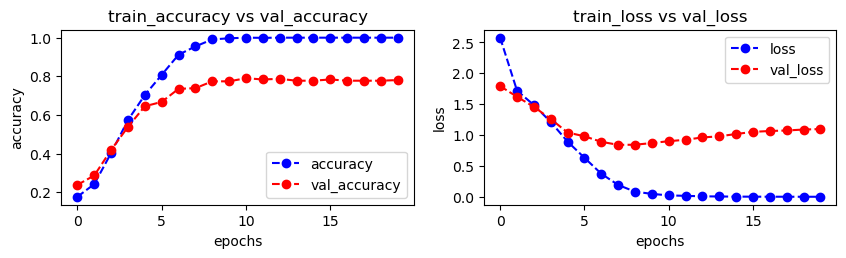

In [115]:
plot_accuracy_loss(history)

In [116]:
test_loss = model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 29ms/step - loss: 1.3990 - accuracy: 0.7132


# error analysis

In [46]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

In [47]:
print_mislabeled_images(labels, test_images, test_labels, pred_labels)

NameError: name 'class_names' is not defined

In [117]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

In [118]:
train_features = model.predict(X_train)
test_features = model.predict(X_test)

13/13 [==============================] - 15s 1s/step


In [78]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [81]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

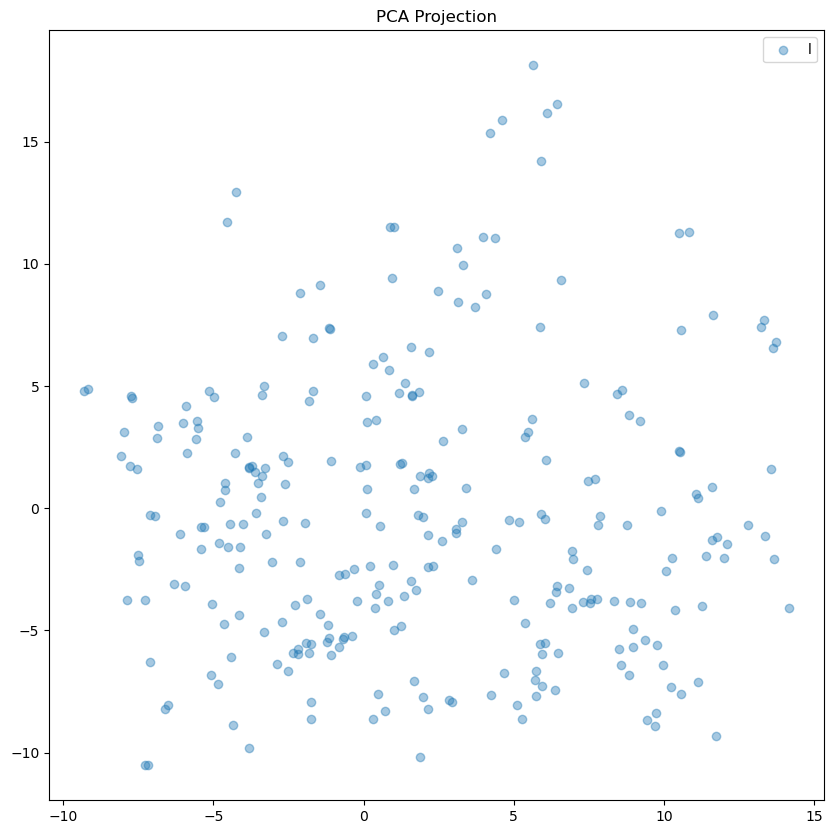

In [80]:
### Figures

plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_name):
    plt.scatter(C1[y_train == i][:1000], C2[y_train == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()


In [83]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, y_train, batch_size=128, epochs=15, validation_split = 0.2)

Epoch 1/15
10/10 [==============================] - 1s 29ms/step - loss: 1.9074 - accuracy: 0.2328 - val_loss: 1.5604 - val_accuracy: 0.3903
Epoch 2/15
10/10 [==============================] - 0s 12ms/step - loss: 1.2980 - accuracy: 0.5416 - val_loss: 1.3315 - val_accuracy: 0.4871
Epoch 3/15
10/10 [==============================] - 0s 17ms/step - loss: 0.9696 - accuracy: 0.7033 - val_loss: 1.2210 - val_accuracy: 0.5484
Epoch 4/15
10/10 [==============================] - 0s 7ms/step - loss: 0.7479 - accuracy: 0.7995 - val_loss: 1.0288 - val_accuracy: 0.6581
Epoch 5/15
10/10 [==============================] - 0s 9ms/step - loss: 0.5647 - accuracy: 0.8707 - val_loss: 0.9493 - val_accuracy: 0.7000
Epoch 6/15
10/10 [==============================] - 0s 11ms/step - loss: 0.4465 - accuracy: 0.9111 - val_loss: 0.8729 - val_accuracy: 0.7258
Epoch 7/15
10/10 [==============================] - 0s 7ms/step - loss: 0.3523 - accuracy: 0.9450 - val_loss: 0.8400 - val_accuracy: 0.7355
Epoch 8/15
10/10

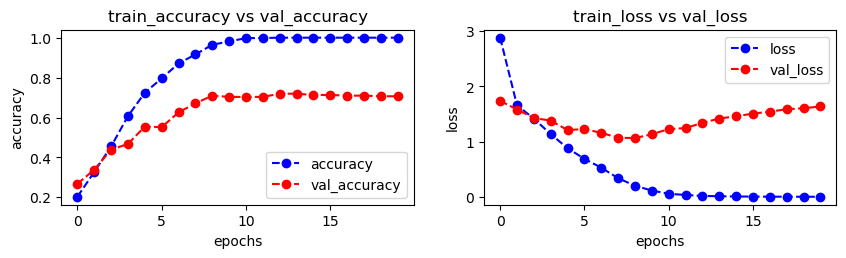

In [84]:
plot_accuracy_loss(history)

In [86]:
test_loss = model2.evaluate(test_features, y_test)

13/13 [==============================] - 0s 15ms/step - loss: 0.7245 - accuracy: 0.7752


In [87]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 10
# Proporition of samples to use to train each training
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

In [88]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store model
    models.append(model)

In [91]:
histories = []

for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], y_train[train_idx], batch_size=128, epochs=10, validation_split = 0.1))

Epoch 1/10
9/9 [==============================] - 0s 29ms/step - loss: 1.7724 - accuracy: 0.3190 - val_loss: 1.2990 - val_accuracy: 0.5726
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 1.1153 - accuracy: 0.6208 - val_loss: 0.9667 - val_accuracy: 0.6532
Epoch 3/10
9/9 [==============================] - 0s 7ms/step - loss: 0.7416 - accuracy: 0.8059 - val_loss: 0.7778 - val_accuracy: 0.7581
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 0.5085 - accuracy: 0.8931 - val_loss: 0.6957 - val_accuracy: 0.8145
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 0.3545 - accuracy: 0.9389 - val_loss: 0.6031 - val_accuracy: 0.8468
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 0.2563 - accuracy: 0.9659 - val_loss: 0.5687 - val_accuracy: 0.8306
Epoch 7/10
9/9 [==============================] - 0s 7ms/step - loss: 0.1869 - accuracy: 0.9784 - val_loss: 0.5613 - val_accuracy: 0.8387
Epoch 8/10
9/9 [=================

In [92]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

13/13 [==============================] - 0s 1ms/step


In [94]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(y_test, pred_labels)))

Accuracy : 0.8113695090439277
